In [1]:
#a module to test the output of c++ freqz function.

In [69]:
import os
import scipy .signal as sig
import numpy as np
import matplotlib.pyplot as plt
import cmath
from math import e, pi

In [70]:
def call_c(command):
    os.system('rm output.txt')
    print(command)
    #call the shell
    os.system(command)
    
    #now read output
    f = open("output.txt", "r")
    x = f.read().split("\n")
    return [float(x) for x in x[:-1]]
    
    

In [89]:
order = 2
samplerate = 48000
numSamples = 1000
ripple = 1
cuttoff = 1000
b, a = sig.cheby1(order, ripple, cuttoff, 'low', fs=samplerate)
print (b, a)
bstring = ''
astring = ''
for i in range(order+1):
    bstring += str(b[i]) + ' '
    astring += str(a[i]) + ' '
output = call_c("./a.out {}".format(order)+' '+bstring+' '+astring+' {} {} output.txt {}'.format(samplerate, numSamples, 1))

[0.0039206 0.0078412 0.0039206] [ 1.         -1.84875445  0.86635039]
./a.out 2 0.0039205997985470595 0.007841199597094119 0.0039205997985470595  1.0 -1.8487544456429137 0.8663503869465231  48000 1000 output.txt 1


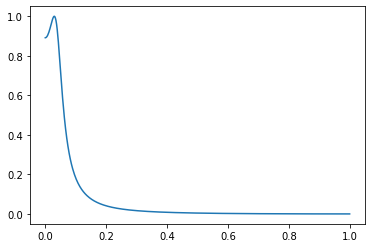

In [90]:
w, h = sig.freqz(b, a)
plt.plot(w/np.pi, np.abs(h))
plt.show()

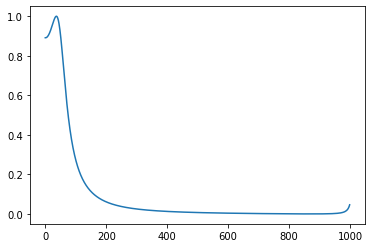

In [91]:

plt.plot(output)
plt.show()